### Import modules and read simulation data

In [1]:
from contrast.box import (tpcf_r, projected_tpcf_r,
    tpcf_rmu, mean_radial_velocity_r, project_to_multipoles)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from astropy.io import fits
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
rc('text', usetex=True)

In [2]:
with fits.open('data/mock_data.fits') as hdul:
    data = hdul[1].data
    
x = data['X']
y = data['Y']
z = data['Z']
vx = data['VX']
vy = data['VY']
vz = data['VZ']

positions = np.c_[x, y, z]
velocities = np.c_[vx, vy, vz]

boxsize = [1500, 1500, 1500]

### Compute the monopole correlation function in 3D

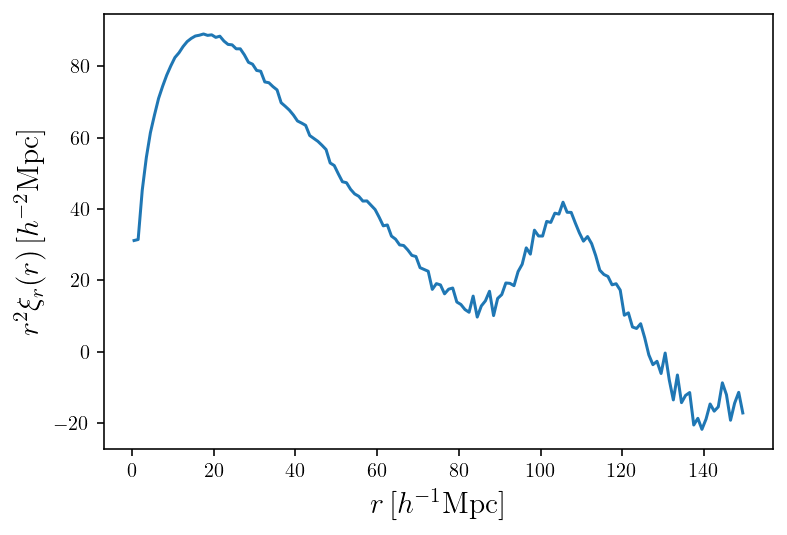

CPU times: user 7min 44s, sys: 2.38 s, total: 7min 46s
Wall time: 2min 11s


In [3]:
%%time
rbins = np.linspace(0, 150, 151)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

xi_r = tpcf_r(positions1=positions, boxsize=boxsize, rbins=rbins, nthreads=4)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, rbins_c ** 2 * xi_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$r^2\xi_r(r)\,[h^{-2}{\rm Mpc}]$', fontsize=15)

plt.show()

### Compute the correlation function in bins of r and mu and project to multipoles.

In [4]:
%%time
rbins = np.linspace(0, 150, 151)
mubins = np.linspace(-1, 1, 100)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

xi_rmu = tpcf_rmu(positions1=positions, boxsize=boxsize,
    rbins=rbins, mubins=mubins, nthreads=4)

CPU times: user 14min 28s, sys: 1.13 s, total: 14min 29s
Wall time: 3min 38s


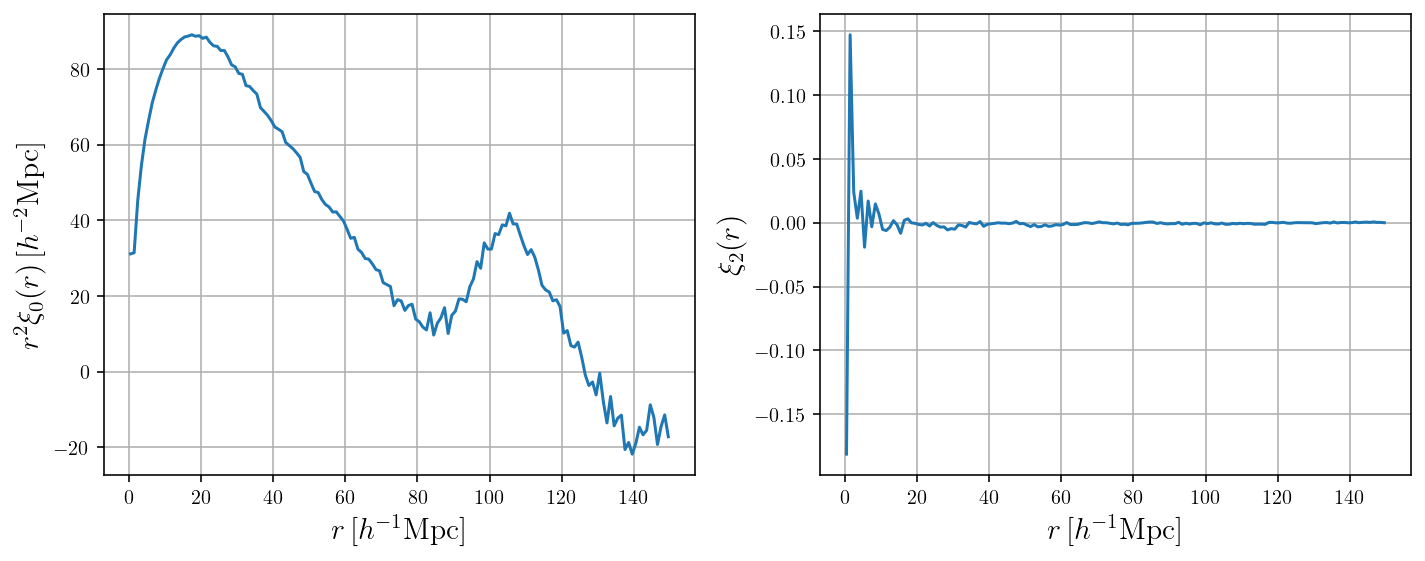

In [5]:
rbins_c, multipoles = project_to_multipoles(rbins_c, mubins, xi_rmu)
xi_0, xi_2, xi_4 = multipoles

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(rbins_c, rbins_c ** 2 * xi_0)
ax[1].plot(rbins_c, rbins_c ** 0 * xi_2)
for aa in ax:
    aa.grid()
    aa.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax[0].set_ylabel(r'$r^2\xi_0(r)\,[h^{-2}{\rm Mpc}]$', fontsize=15)
ax[1].set_ylabel(r'$\xi_2(r)$', fontsize=15)
plt.tight_layout()
plt.show()

### Compute the projected correlation function in the x-y plane

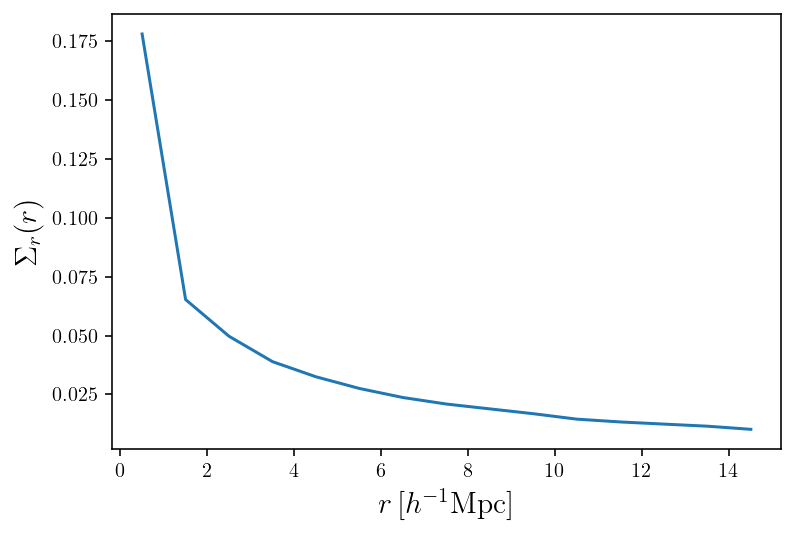

CPU times: user 22.5 s, sys: 266 ms, total: 22.8 s
Wall time: 6.82 s


In [6]:
%%time
boxsize = 1500
rbins = np.linspace(0, 15, 16)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

sigma_r = projected_tpcf_r(positions1=positions[:, :2], boxsize=boxsize, rbins=rbins, nthreads=4)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, sigma_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$\Sigma_r(r)$', fontsize=15)

plt.show()

### Compute the mean radial pairwise velocity as a function of r

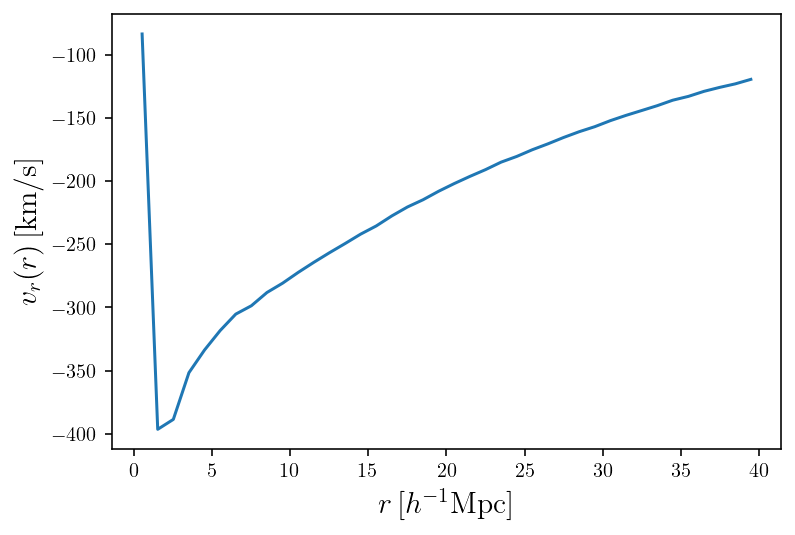

CPU times: user 46.6 s, sys: 4.11 s, total: 50.7 s
Wall time: 16.9 s


In [4]:
%%time

rbins = np.linspace(0, 40, 41)
rbins_c = 0.5*(rbins[1:] + rbins[:-1])

v_r = mean_radial_velocity_r(positions1=positions, velocities1=velocities,
    box_size=box_size, rbins=rbins, nthreads=4)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(rbins_c, v_r)
ax.set_xlabel(r'$r\,[h^{-1}{\rm Mpc}]$', fontsize=15)
ax.set_ylabel(r'$v_r(r)\,[{\rm km/s}]$', fontsize=15)

plt.show()